<a href="https://colab.research.google.com/github/Arifa55/Arifa55/blob/main/Breast%20Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# To make sure we are using gpu not cpu
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten , Dropout , BatchNormalization, MaxPooling2D, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import Callback, ModelCheckpoint, CSVLogger

import tensorflow as tf

import pickle

from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:

train = datagen.flow_from_directory('/content/gdrive/My Drive/train/', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate validation dataset
val = datagen.flow_from_directory('/content/gdrive/My Drive/val/', target_size=(224, 224), class_mode='binary', batch_size=64)
# load and iterate test dataset
test = datagen.flow_from_directory('/content/gdrive/My Drive/test/', target_size=(224, 224), class_mode='binary', batch_size=64)

Found 3816 images belonging to 2 classes.
Found 1908 images belonging to 2 classes.
Found 1928 images belonging to 2 classes.


In [ ]:
imgs, labels = next(train)

In [ ]:
imgs.shape

(64, 224, 224, 3)

In [ ]:
train.class_indices


{'Benign': 0, 'Malignant': 1}

1.0


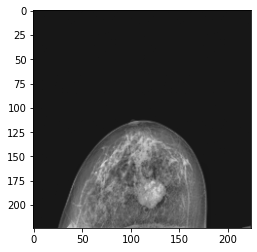

In [ ]:
plt.imshow(imgs[0])
print(labels[0])

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 64)      

In [ ]:
STEP_SIZE_TRAIN = train.n//train.batch_size
STEP_SIZE_VAL = val.n//val.batch_size

In [ ]:
csv_logger = CSVLogger('/content/gdrive/My Drive/training.log', separator=',', append=False)

In [ ]:
history = model.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=25,
                    callbacks=[csv_logger])
model.save('/content/gdrive/My Drive/first_model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
59/59 [==============================] - 23s 327ms/step - loss: 0.7181 - accuracy: 0.6546 - val_loss: 0.6457 - val_accuracy: 0.6665
Epoch 2/25
59/59 [==============================] - 19s 313ms/step - loss: 0.6438 - accuracy: 0.6679 - val_loss: 0.6310 - val_accuracy: 0.6692
Epoch 3/25
59/59 [==============================] - 18s 310ms/step - loss: 0.6225 - accuracy: 0.6698 - val_loss: 0.6145 - val_accuracy: 0.6719
Epoch 4/25
59/59 [==============================] - 19s 328ms/step - loss: 0.5810 - accuracy: 0.6842 - val_loss: 0.6099 - val_accuracy: 0.6816
Epoch 5/25
59/59 [==============================] - 19s 313ms/step - loss: 0.5458 - accuracy: 0.7111 - val_loss: 0.5684 - val_accuracy: 0.7010
Epoch 6/25
59/59 [==============================] - 19s 317ms/step - loss: 0.4905 - accuracy: 0.7479 - val_loss: 0.5528 - val_accuracy: 0.7311
Epoch 7/25
59/59 [==============================] - 20s 337ms/step - loss: 0.4363 - accuracy: 0.7873 - val_loss: 0.5126 - val_accuracy: 0.7532

In [ ]:
import pandas as pd
log_data = pd.read_csv('/content/gdrive/My Drive/training.log', sep=',', engine='python')

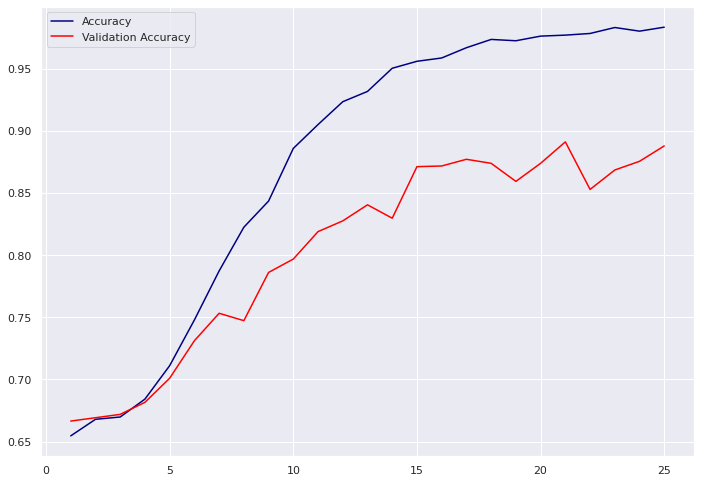

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(history.history['accuracy'])+1,1), history.history['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

In [ ]:
# show the accuracy graph from the saved history (log_data)
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['accuracy'], color='navy', label = 'Accuracy')
plt.plot(np.arange(1, len(log_data['accuracy'])+1,1), log_data['val_accuracy'], color='red', label='Validation Accuracy')
plt.legend()

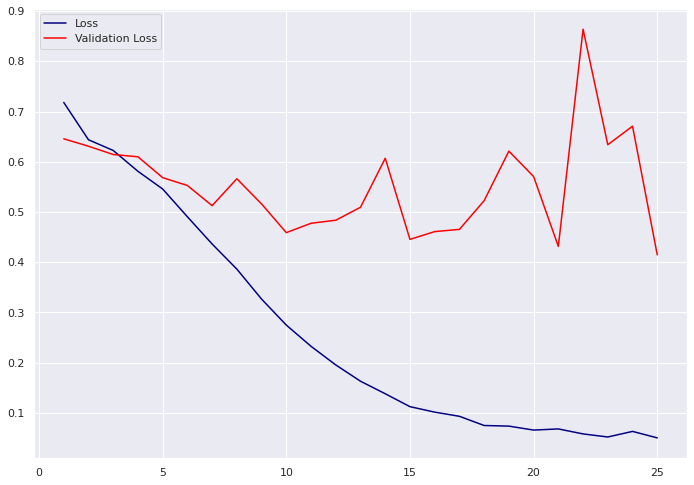

In [ ]:
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(history.history['loss'])+1,1), history.history['val_loss'], color='red', label='Validation Loss')
plt.legend()

In [ ]:
# show the loss graph from the saved history (log_data)

plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['loss'], color='navy', label = 'Loss')
plt.plot(np.arange(1, len(log_data['loss'])+1,1), log_data['val_loss'], color='red', label='Validation Loss')
plt.legend()

In [ ]:
from keras.models import load_model

restored_model = load_model('/content/gdrive/My Drive/first_model.h5')

In [ ]:
steps = test.n//test.batch_size

test.reset()
X_test, y_test = [] , []
for i in range(steps):
    a , b = test.next()
    X_test.extend(a)
    y_test.extend(b)

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
pickle.dump(X_test, open('/content/gdrive/My Drive/X_test.pkl', 'wb'))
pickle.dump(y_test, open('/content/gdrive/My Drive/y_test.pkl', 'wb'))

In [ ]:
X_test = pickle.load(open('/content/gdrive/My Drive/X_test.pkl', 'rb'))
y_test = pickle.load(open('/content/gdrive/My Drive/y_test.pkl', 'rb'))

In [ ]:
print(X_test.shape, y_test.shape)

(1920, 224, 224, 3) (1920,)


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.41484925150871277 / Test accuracy: 0.8885416388511658


In [ ]:
# Using the saved model
score = restored_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
y_pred_prob = model.predict(X_test)

In [ ]:
# Using the saved model
y_pred_prob = restored_model.predict(X_test)

In [ ]:
y_pred_prob

array([[6.3605723e-05],
       [7.8963405e-01],
       [9.9998617e-01],
       ...,
       [2.8432084e-03],
       [7.2051102e-01],
       [2.9555806e-06]], dtype=float32)

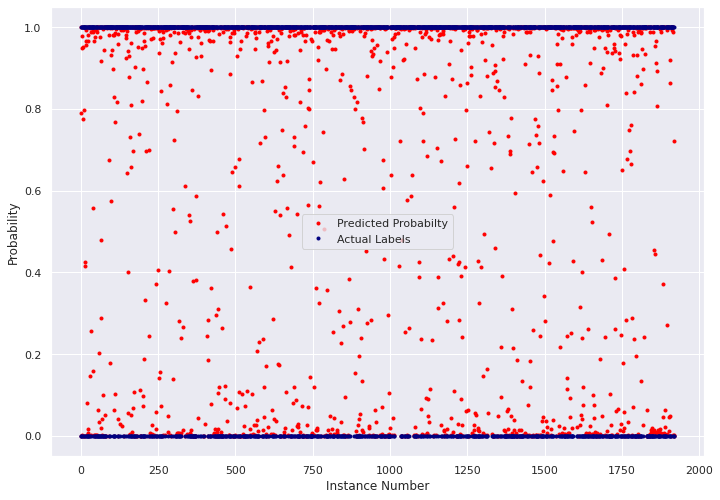

In [ ]:
plt.plot(y_pred_prob,'.',color='red',label='Predicted Probabilty')
plt.plot(y_test,'.',color='navy',label='Actual Labels')
plt.xlabel('Instance Number')
plt.ylabel('Probability')
plt.legend()

In [ ]:
y_test

array([0., 0., 1., ..., 0., 1., 0.], dtype=float32)

In [ ]:
threshold = 0.5
y_pred = np.where(y_pred_prob > threshold, 1,0)
y_pred.squeeze()

array([0, 1, 1, ..., 1, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

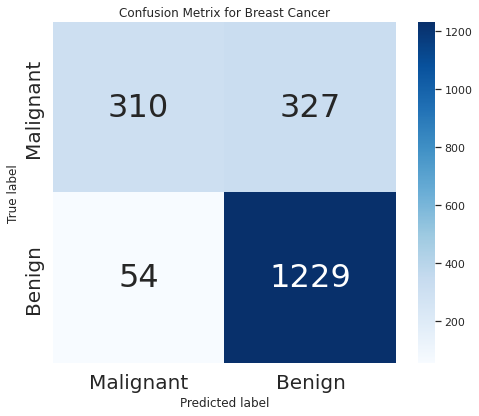

In [ ]:
from sklearn.metrics import confusion_matrix

sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.85      0.49      0.62       637
Malignant (Class 1)       0.79      0.96      0.87      1283

           accuracy                           0.80      1920
          macro avg       0.82      0.72      0.74      1920
       weighted avg       0.81      0.80      0.78      1920



In [ ]:
from sklearn.metrics import roc_curve, auc

fpr , tpr , thresholds = roc_curve (y_test , y_pred_prob)

area_under_curve = auc(fpr, tpr)

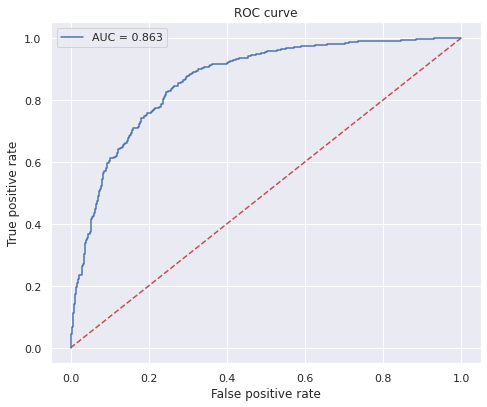

In [ ]:
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area_under_curve))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
cancer_labels = ['Benign','Malignant']

img_indices = np.random.randint(0, len(X_test), size=[25])
sample_test_images = X_test[img_indices]
sample_test_labels = [cancer_labels[i] for i in y_pred[img_indices].squeeze()]

max_prediction = np.argmax(y_pred_prob, axis=1)
prediction_probs = np.max(y_pred_prob, axis=1)

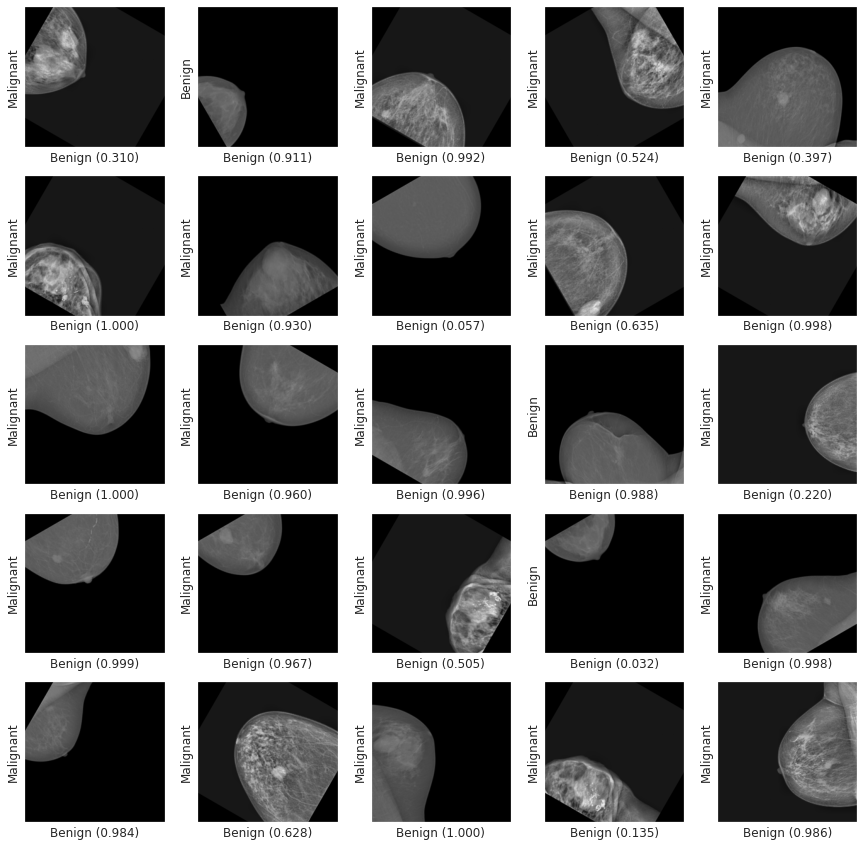

In [ ]:
plt.figure(figsize=(15,15))
for i, (img, prediction, prob, true_label) in enumerate(
    zip(sample_test_images, max_prediction, prediction_probs, sample_test_labels)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')

  plt.imshow(img)
  plt.xlabel('{} ({:0.3f})'.format(cancer_labels[prediction], prob))
  plt.ylabel('{}'.format(true_label))


# Transfer Learning using VGG16

## Feature Extraction (freezing the convolutional bases)

In [ ]:
from keras.applications.vgg16 import VGG16

backbone = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
backbone.trainable = False

In [ ]:
VGG_model = Sequential()
VGG_model.add(backbone)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())
VGG_model.add(Dropout(0.5))
VGG_model.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
VGG_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 512)               12845568  
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 513       
                                                      

In [ ]:
# Checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

In [ ]:
history = VGG_model.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model.save('/content/gdrive/My Drive/VGG_model.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
59/59 [==============================] - 40s 665ms/step - loss: 0.8029 - accuracy: 0.5754 - val_loss: 0.6325 - val_accuracy: 0.6724
Epoch 2/10
59/59 [==============================] - 39s 663ms/step - loss: 0.6008 - accuracy: 0.6922 - val_loss: 0.5218 - val_accuracy: 0.7942
Epoch 3/10
59/59 [==============================] - 39s 663ms/step - loss: 0.5096 - accuracy: 0.7508 - val_loss: 0.5044 - val_accuracy: 0.7786
Epoch 4/10
59/59 [==============================] - 39s 663ms/step - loss: 0.4480 - accuracy: 0.7862 - val_loss: 0.5234 - val_accuracy: 0.7381
Epoch 5/10
59/59 [==============================] - 39s 663ms/step - loss: 0.3739 - accuracy: 0.8308 - val_loss: 0.5398 - val_accuracy: 0.7360
Epoch 6/10
59/59 [==============================] - 39s 663ms/step - loss: 0.3466 - accuracy: 0.8428 - val_loss: 0.3833 - val_accuracy: 0.8367
Epoch 7/10
59/59 [==============================] - 39s 663ms/step - loss: 0.3193 - accuracy: 0.8651 - val_loss: 0.4098 - val_accuracy: 0.8157

In [ ]:
VGG_model = load_model('/content/gdrive/My Drive/VGG_model.h5')

In [ ]:
score1 = VGG_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score1[0]} / Test accuracy: {score1[1]}')

Test loss: 0.3554753363132477 / Test accuracy: 0.8473958373069763


In [ ]:
y_pred_prob_2 = VGG_model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_2 = np.where(y_pred_prob_2 > threshold, 1,0)
y_pred_2.squeeze()

array([0, 1, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

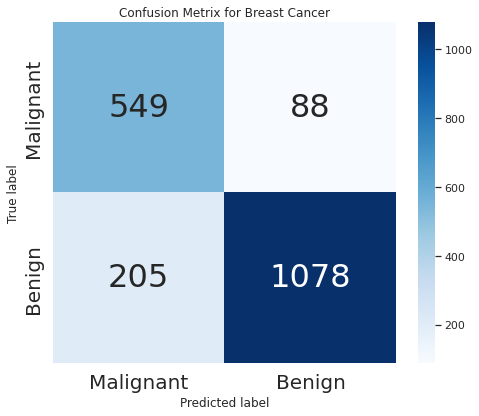

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_2),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_2, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.73      0.86      0.79       637
Malignant (Class 1)       0.92      0.84      0.88      1283

           accuracy                           0.85      1920
          macro avg       0.83      0.85      0.83      1920
       weighted avg       0.86      0.85      0.85      1920



## Fine Tuning

In [ ]:
backbone2 = VGG16(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

In [ ]:
backbone.trainable = True

In [ ]:
# Unfreeze final 2 convolution blocks

set_trainable = False
for layer in backbone2.layers:
    if layer.name == 'block4_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
VGG_model_2 = Sequential()
VGG_model_2.add(backbone2)
VGG_model_2.add(GlobalAveragePooling2D())
VGG_model_2.add(BatchNormalization())
VGG_model_2.add(Dropout(0.5))
VGG_model_2.add(Dense(1, activation='sigmoid'))

In [ ]:
VGG_model_2.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
VGG_model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_1   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 513       
                                                                 
Total params: 14,717,249
Trainable params: 12,980,737


In [ ]:
history = VGG_model_2.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
VGG_model_2.save('/content/gdrive/My Drive/VGG_model_2.h5')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/10
59/59 [==============================] - 58s 904ms/step - loss: 0.6842 - accuracy: 0.6026 - val_loss: 0.6042 - val_accuracy: 0.6692
Epoch 2/10
59/59 [==============================] - 52s 883ms/step - loss: 0.4882 - accuracy: 0.7641 - val_loss: 0.6270 - val_accuracy: 0.6686
Epoch 3/10
59/59 [==============================] - 52s 885ms/step - loss: 0.3569 - accuracy: 0.8382 - val_loss: 0.6553 - val_accuracy: 0.5490
Epoch 4/10
59/59 [==============================] - 52s 886ms/step - loss: 0.2372 - accuracy: 0.9057 - val_loss: 0.3901 - val_accuracy: 0.8879
Epoch 5/10
59/59 [==============================] - 52s 881ms/step - loss: 0.2070 - accuracy: 0.9168 - val_loss: 0.2887 - val_accuracy: 0.9073
Epoch 6/10
59/59 [==============================] - 52s 881ms/step - loss: 0.1273 - accuracy: 0.9491 - val_loss: 0.9139 - val_accuracy: 0.6562
Epoch 7/10
59/59 [==============================] - 52s 882ms/step - loss: 0.1012 - accuracy: 0.9624 - val_loss: 0.1966 - val_accuracy: 0.9133

In [ ]:
VGG_model_2 = load_model('/content/gdrive/My Drive/VGG_model_2.h5')

In [ ]:
score2 = VGG_model_2.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score2[0]} / Test accuracy: {score2[1]}')

Test loss: 0.5398589968681335 / Test accuracy: 0.8374999761581421


In [ ]:
y_pred_prob_3 = VGG_model_2.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_3 = np.where(y_pred_prob_3 > threshold, 1,0)
y_pred_3.squeeze()

array([0, 0, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

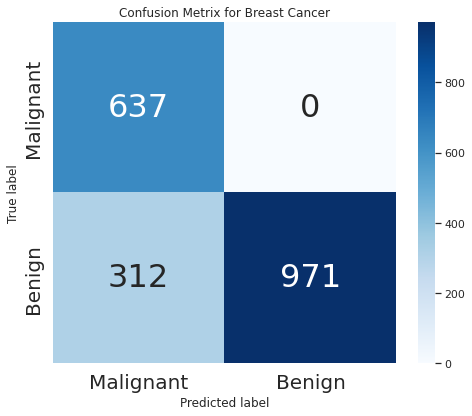

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_3),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_3, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

                     precision    recall  f1-score   support

   Benign (Class 0)       0.67      1.00      0.80       637
Malignant (Class 1)       1.00      0.76      0.86      1283

           accuracy                           0.84      1920
          macro avg       0.84      0.88      0.83      1920
       weighted avg       0.89      0.84      0.84      1920



# Transfer Learning using ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
backbone3 = ResNet50(input_shape = (224, 224, 3), include_top=False, weights='imagenet')

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
backbone3.training = False

In [ ]:
ResNet50_model = Sequential()
ResNet50_model.add(backbone3)
ResNet50_model.add(GlobalAveragePooling2D())
ResNet50_model.add(Dropout(0.5))
ResNet50_model.add(Dense(1, activation='sigmoid'))

In [ ]:
ResNet50_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
ResNet50_model.compile(
        loss='binary_crossentropy',
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),
        metrics=['accuracy']
    )

In [ ]:
history = ResNet50_model.fit_generator(generator = train,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=test,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=10)
ResNet50_model.save('/content/gdrive/My Drive/ResNet50_model.h5')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


59/59 [==============================] - 49s 728ms/step - loss: 0.1514 - accuracy: 0.9414 - val_loss: 0.7729 - val_accuracy: 0.6352
Epoch 2/10
59/59 [==============================] - 43s 733ms/step - loss: 0.0323 - accuracy: 0.9891 - val_loss: 0.7933 - val_accuracy: 0.6703
Epoch 3/10
59/59 [==============================] - 43s 724ms/step - loss: 0.0285 - accuracy: 0.9901 - val_loss: 0.7575 - val_accuracy: 0.7117
Epoch 4/10
59/59 [==============================] - 44s 740ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.8219 - val_accuracy: 0.7058
Epoch 5/10
59/59 [==============================] - 43s 729ms/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.7284 - val_accuracy: 0.7441
Epoch 6/10
59/59 [==============================] - 43s 726ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 0.6851 - val_accuracy: 0.7548
Epoch 7/10
59/59 [==============================] - 43s 726ms/step - loss: 0.0032 - accuracy: 0.9995 - val_loss: 0.6800 - val_accuracy: 0.7651
Epoch 8/10

In [ ]:
ResNet50_model = load_model('/content/gdrive/My Drive/ResNet50_model.h5')

NameError: ignored

In [ ]:
score3 = ResNet50_model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score3[0]} / Test accuracy: {score3[1]}')

Test loss: 0.31827858090400696 / Test accuracy: 0.8645833134651184


In [ ]:
y_pred_prob_4 = ResNet50_model.predict(X_test)

In [ ]:
threshold = 0.5
y_pred_4 = np.where(y_pred_prob_4 > threshold, 1,0)
y_pred_4.squeeze()

array([1, 1, 1, ..., 0, 1, 1])

Text(0.5, 1.0, 'Confusion Metrix for Breast Cancer')

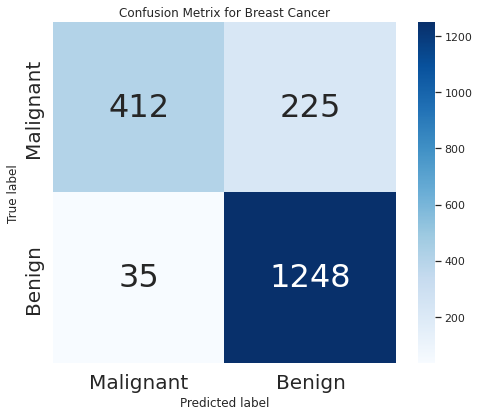

In [ ]:
sns.set(rc={'figure.figsize':(7.7,6.27)})

sns.heatmap(confusion_matrix(y_test,y_pred_4),cmap=plt.cm.Blues,annot=True,annot_kws={"size": 32}, fmt='g')
plt.xticks([0.50,1.50], ['Malignant','Benign'], fontsize=20)
plt.yticks([0.50,1.50],['Malignant','Benign'], fontsize=20)

plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.title('Confusion Metrix for Breast Cancer')

In [ ]:
print(classification_report(y_test, y_pred_4, target_names = ['Benign (Class 0)','Malignant (Class 1)']))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/INbreast Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
!pip install Livelossplot
from livelossplot import PlotLossesKeras

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install colorama

In [ ]:
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
# import pydot

from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import xgboost as xgb

print("All modules have been imported")

All modules have been imported


#ResNet101

In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Specify the folder containing images
image_folder = "/content/drive/MyDrive/INbreast Dataset (1)"  # Change this path

# List and print all image files
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

print("List of images in the folder:")
for img in image_files:
    print(img)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
List of images in the folder:


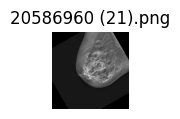

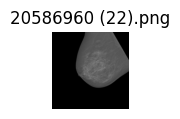

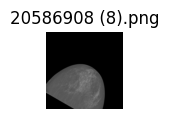

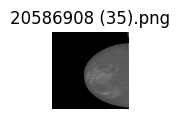

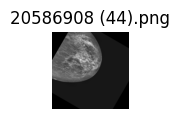

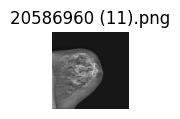

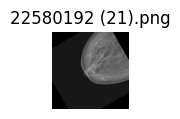

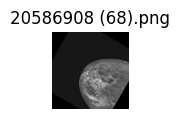

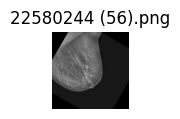

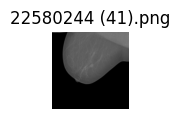

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Set the path to your images folder in Google Drive
image_folder = "/content/drive/MyDrive/INbreast Dataset (1)/Benign Masses (1)"  # Update this path

# List all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Check if images exist in the folder
if not image_files:
    print("No images found in the folder.")
else:
    # Display images
    for img_file in image_files[:10]:
        img_path = os.path.join(image_folder, img_file)

        # Read and convert image (OpenCV loads images in BGR format)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct colors

        # Show image using Matplotlib
        plt.figure(figsize=(1, 1))
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(img_file)
        plt.show()


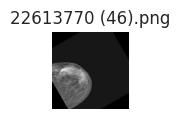

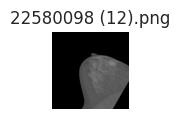

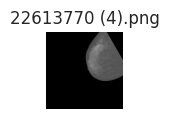

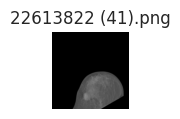

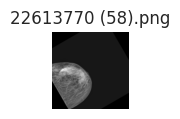

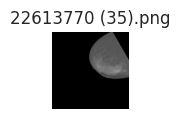

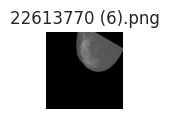

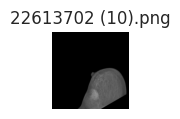

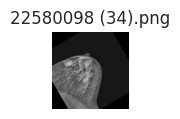

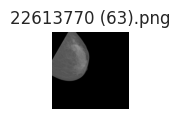

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2

# Set the path to your images folder in Google Drive
image_folder = "/content/drive/MyDrive/INbreast Dataset (1)/Malignant Masses (1)"  # Update this path

# List all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Check if images exist in the folder
if not image_files:
    print("No images found in the folder.")
else:
    # Display images;
    for img_file in image_files[:10]:
        img_path = os.path.join(image_folder, img_file)

        # Read and convert image (OpenCV loads images in BGR format)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct colors

        # Show image using Matplotlib
        plt.figure(figsize=(1, 1))
        plt.imshow(img)
        plt.axis('off')  # Hide axis
        plt.title(img_file)
        plt.show()


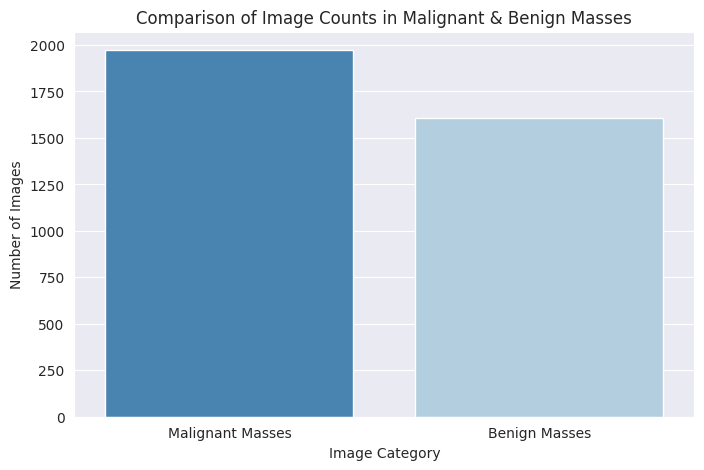

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Set the paths to your image folders in Google Drive
image_folder_1 = "/content/drive/MyDrive/INbreast Dataset (1)/Malignant Masses (1)"  # Update this path
image_folder_2 = "/content/drive/MyDrive/INbreast Dataset (1)/Benign Masses (1)"  # Update this path

# Count images in each folder
image_count_1 = len([f for f in os.listdir(image_folder_1) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])
image_count_2 = len([f for f in os.listdir(image_folder_2) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))])

# Create a dictionary with image counts
image_counts = {
    "Malignant Masses": image_count_1,
    "Benign Masses": image_count_2
}

# Convert data for visualization
categories = list(image_counts.keys())
counts = list(image_counts.values())

# Set Seaborn style
sns.set_style('darkgrid')

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=categories, y=counts, palette='Blues_r')

# Labels and title
plt.xlabel("Image Category")
plt.ylabel("Number of Images")
plt.title("Comparison of Image Counts in Malignant & Benign Masses")

# Show the plot
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image size & batch size
IMAGE_SIZE = (224, 224)  # ResNet-50 requires 224x224 images
BATCH_SIZE = 32

# Define dataset paths
train_dir = "/content/drive/MyDrive/INbreast Dataset (1)"  # Parent directory containing 'Malignant' & 'Benign' folders

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% data for validation
)

# Load training & validation datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Since we have 2 classes
    subset='training'
)
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define image size & batch size
IMAGE_SIZE = (224, 224)  # ResNet-101 requires 224x224 images
BATCH_SIZE = 32

# Define dataset paths
train_dir = "/content/drive/MyDrive/INbreast Dataset (1)"  # Parent directory containing 'Malignant' & 'Benign' folders

# Data Augmentation & Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values between 0 and 1
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use 20% data for validation
)

# Load training & validation datasets
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Since we have 2 classes
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)


Found 2866 images belonging to 2 classes.
Found 2866 images belonging to 2 classes.
Found 715 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Load pretrained ResNet-101 without the top layer
base_model = ResNet101(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers (except the last few for fine-tuning)
for layer in base_model.layers[:-10]:  # Unfreeze last 10 layers for fine-tuning
    layer.trainable = False

# Build the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification (Malignant vs. Benign)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Summary
model.summary()


171446536/171446536 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet101 (Functional)               │ (None, 7, 7, 2048)          │      42,658,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      51,380,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,039,425 (358.73 MB)

 Trainable params: 55,846,913 (213.04 MB)

 Non-trainable params: 38,192,512 (145.69 MB)

In [ ]:
# Train the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10,  # Adjust based on performance
    batch_size=BATCH_SIZE
)


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 102s 892ms/step - accuracy: 0.5264 - loss: 1.1166 - val_accuracy: 0.4294 - val_loss: 0.6993
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 634ms/step - accuracy: 0.5370 - loss: 0.6919 - val_accuracy: 0.5510 - val_loss: 0.7017
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 634ms/step - accuracy: 0.5887 - loss: 0.6764 - val_accuracy: 0.5510 - val_loss: 0.7278
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 650ms/step - accuracy: 0.5160 - loss: 0.7058 - val_accuracy: 0.5510 - val_loss: 0.7233
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 642ms/step - accuracy: 0.5592 - loss: 0.6765 - val_accuracy: 0.5329 - val_loss: 0.7157
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 649ms/step - accuracy: 0.5568 - loss: 0.6767 - val_accuracy: 0.5510 - val_loss: 0.7437
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 58s 647ms/step - accuracy: 0.5569 - loss: 0.6808 - val_accuracy: 0.5608 - val_loss: 0.7155
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 57s 637ms/step - accuracy: 0.5634 - loss: 0.6777 - val_acc

In [ ]:
# Evaluate model on validation set
val_loss, val_acc = model.evaluate(val_data)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")


23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 471ms/step - accuracy: 0.5653 - loss: 0.8091
Validation Accuracy: 56.64%


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize

    prediction = model.predict(img_array)
    class_label = "Malignant" if prediction[0][0] > 0.5 else "Benign"

    print(f"Predicted Class: {class_label}")

# Test on a new image
test_image_path = "/content/drive/MyDrive/INbreast Dataset (1)/Malignant Masses (1)/sample.jpg"  # Update with actual path
predict_image(test_image_path, model)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/INbreast Dataset (1)/Malignant Masses (1)/sample.jpg'

In [ ]:
# Save the trained model
model.save('/content/drive/MyDrive/resnet101_model.h5')

# Load the saved model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/resnet101_model.h5')


In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Load and preprocess images
def load_images(image_folder):
    images = []
    labels = []
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            images.append(img)
            label = filename.split('_')[0]  # Assuming label is in the filename
            labels.append(label)
    return np.array(images), np.array(labels)

image_folder = '/content/drive/MyDrive/INbreast Dataset (1)/Benign Masses (1)'
X, y = load_images(image_folder)

# Normalize and encode labels
X = X / 255.0
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build ANN model
model = models.Sequential([
    layers.Flatten(input_shape=(128, 128, 3)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Epoch 1/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.0000e+00 - loss: 8.1173 - val_accuracy: 0.0000e+00 - val_loss: 7.4183
Epoch 2/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 7.3438 - val_accuracy: 0.0000e+00 - val_loss: 7.5411
Epoch 3/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0047 - loss: 7.2517 - val_accuracy: 0.0000e+00 - val_loss: 7.8533
Epoch 4/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0049 - loss: 7.1246 - val_accuracy: 0.0000e+00 - val_loss: 7.9272
Epoch 5/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0019 - loss: 6.8316 - val_accuracy: 0.0000e+00 - val_loss: 8.4604
Epoch 6/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0137 - loss: 6.6458 - val_accuracy: 0.0000e+00 - val_loss: 8.7417
Epoch 7/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0064 - loss: 6.4877 - val_accuracy: 0.0000e+00 - val_loss: 9.0453
Epoch 8/20
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.0144 - loss: 6.3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# Step 1: Load and preprocess images from both datasets

def load_images(image_folder, label_name):
    images = []
    labels = []
    for filename in os.listdir(image_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(image_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128, 128))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert to grayscale
            images.append(img)
            labels.append(label_name)
    return images, labels


In [ ]:
# Paths for datasets
malignant_folder = '/content/drive/MyDrive/INbreast Dataset (1)/Benign Masses (1)'
benign_folder = '/content/drive/MyDrive/INbreast Dataset (1)/Malignant Masses (1)'


In [ ]:
# Load both datasets
malignant_images, malignant_labels = load_images(malignant_folder, 'malignant')
benign_images, benign_labels = load_images(benign_folder, 'benign')
# Combine data
X = np.array(malignant_images + benign_images)
y = np.array(malignant_labels + benign_labels)

In [ ]:
# Step 2: Normalize and reshape for RNN
X = X / 255.0
X = X.reshape(X.shape[0], 128, 128, 1)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y = to_categorical(y)


In [ ]:
# Step 3: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Build RNN model
model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Step 5: Train model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)



Epoch 1/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 67s 904ms/step - accuracy: 0.5422 - loss: 0.6959 - val_accuracy: 0.6283 - val_loss: 0.6562
Epoch 2/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 87s 979ms/step - accuracy: 0.6651 - loss: 0.6199 - val_accuracy: 0.6178 - val_loss: 0.6427
Epoch 3/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 66s 917ms/step - accuracy: 0.7684 - loss: 0.5018 - val_accuracy: 0.6946 - val_loss: 0.5934
Epoch 4/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 65s 911ms/step - accuracy: 0.8371 - loss: 0.3745 - val_accuracy: 0.7679 - val_loss: 0.5743
Epoch 5/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 82s 902ms/step - accuracy: 0.9115 - loss: 0.2405 - val_accuracy: 0.8255 - val_loss: 0.5036
Epoch 6/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 914ms/step - accuracy: 0.9577 - loss: 0.1325 - val_accuracy: 0.8621 - val_loss: 0.4841
Epoch 7/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 81s 909ms/step - accuracy: 0.9747 - loss: 0.0820 - val_accuracy: 0.8447 - val_loss: 0.6321
Epoch 8/20
72/72 ━━━━━━━━━━━━━━━━━━━━ 65s 901ms/step - accuracy: 0.9889 - loss: 0.0469 - val_accu

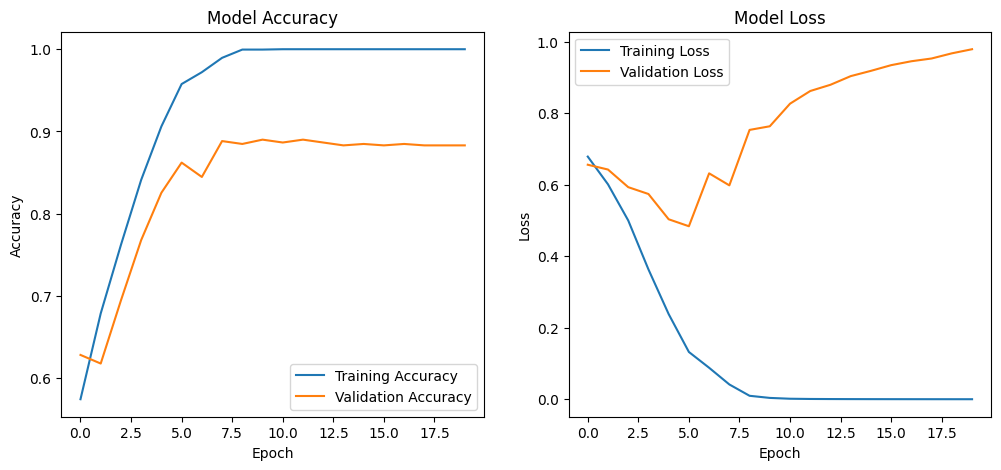

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.show()







In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Print classification report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 285ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       378
           1       0.92      0.87      0.90       339

    accuracy                           0.90       717
   macro avg       0.91      0.90      0.90       717
weighted avg       0.90      0.90      0.90       717

Confusion Matrix:
 [[353  25]
 [ 44 295]]


** Build BiLSTM (Bidirectional LSTM) model**

In [ ]:
# Step 4: Build BiLSTM (Bidirectional LSTM) model
model = Sequential([
    layers.Reshape((1, 128, 128, 1), input_shape=(128, 128, 1)),  # Reshape to 5D
    layers.TimeDistributed(layers.Conv2D(32, (3,3), activation='relu')),
    layers.TimeDistributed(layers.MaxPooling2D((2,2))),
    layers.TimeDistributed(layers.Flatten()),
    layers.Bidirectional(layers.LSTM(128, return_sequences=False)),
    layers.Dense(64, activation='relu'),
    layers.Dense(y.shape[1], activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Step 5: Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 282s 4s/step - accuracy: 0.5376 - loss: 0.7293 - val_accuracy: 0.5253 - val_loss: 0.6975
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.6005 - loss: 0.6668 - val_accuracy: 0.6649 - val_loss: 0.6493
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 267s 4s/step - accuracy: 0.6570 - loss: 0.6380 - val_accuracy: 0.6213 - val_loss: 0.6452
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 257s 4s/step - accuracy: 0.6858 - loss: 0.5920 - val_accuracy: 0.7382 - val_loss: 0.5362
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.8539 - loss: 0.3674 - val_accuracy: 0.8237 - val_loss: 0.4498
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.9591 - loss: 0.1245 - val_accuracy: 0.8551 - val_loss: 0.4610
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 316s 4s/step - accuracy: 0.9896 - loss: 0.0343 - val_accuracy: 0.8813 - val_loss: 0.5118
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 273s 4s/step - accuracy: 0.9991 - loss: 0.0126 - val_accuracy: 0.8866 - v

In [ ]:
# Step 6: Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.9055 - loss: 0.5182
Test Accuracy: 91.49%


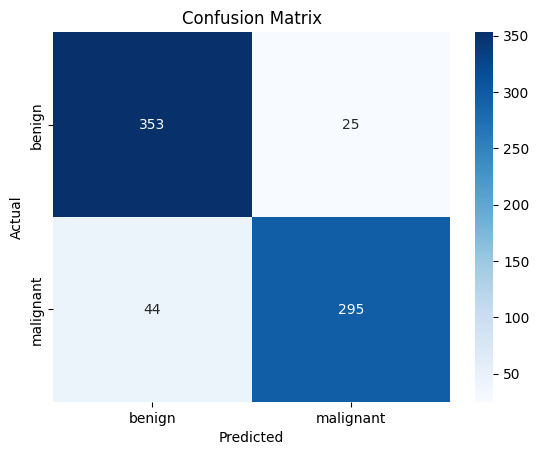

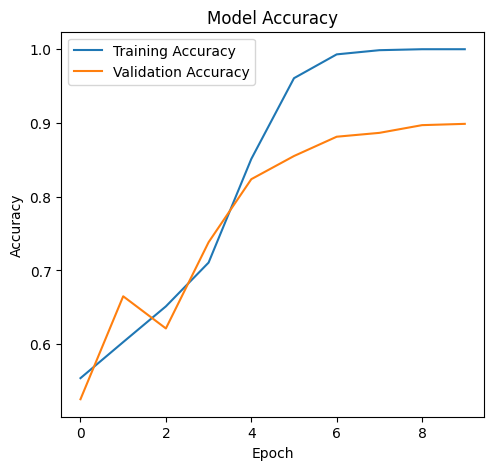

In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

# Assuming y_true and y_pred_classes are available from previous cells
# Step 8: Plot Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)  # Use y_true instead of y_true_labels, and y_pred_classes instead of predicted_labels
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 9: Plot Test Loss and Accuracy
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()